In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [183]:
class Polynomial_Regresison():
    def __init__(self, degree):
        self.degree = degree
    
    def __call__(self, x):
        return self.forward(x)
    def fit(self, x_train, t_train, alpha=0):
        X = np.ones((len(x_train), self.degree + 1))
        for i in range(len(x_train)):
            for k in range(1, self.degree + 1):
                X[i][k] = np.power(x_train[i], k)
        regular = alpha * np.eye(int(self.degree + 1))
        W = np.dot(np.linalg.inv(np.dot(X.T, X) + regular), X.T)
        W = np.dot(W, t_train)
        self.W = W
    def forward(self, x):
        res = np.poly1d(self.W[::-1])
        return res(x)

In [170]:
def get_data(data_size, noise = False):
    x = sorted(np.random.randint(-30, 31, data_size))
    res = np.poly1d([0.6, -10, -5, 0.6])
    y = res(x)
    if noise:
        y = y + np.random.randint(-200, 201, data_size)
    return x, y

In [171]:
train_x, train_t = get_data(10, noise = True)

In [172]:
model = Polynomial_Regresison(degree=3)

In [173]:
model.fit(train_x, train_t)

[-25, -20, -8, -3, 3, 4, 24, 24, 29, 30]
[-1.54051962e+04 -8.68545771e+03 -9.11993956e+02 -6.11374236e+01
 -7.36640240e+00 -5.19081739e+01  2.47341175e+03  2.47341175e+03
  6.02054710e+03  6.96108927e+03]


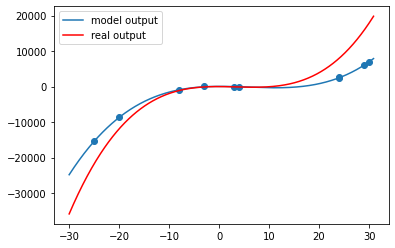

In [178]:
res = np.poly1d([1, -10, -5, 0.6])
domain = np.arange(-30, 31, 0.1)
true_output = np.array([ res(x) for x in domain])
plt.scatter(train_x, train_t)
plt.plot(domain, model(domain), label='model output')
plt.plot(domain, true_output, 'r', label = 'real output')
plt.legend()
print(train_x)
print(model(train_x))
plt.savefig('overfitting.png')

In [160]:
print('model output: {}'.format(model(13)))
print('real output: {}'.format(res(13)))

model output: 712.417070125256
real output: 442.6


In [209]:
model.fit(train_x, train_t, alpha=8_000_000)

[-25, -20, -8, -3, 3, 4, 24, 24, 29, 30]
[-7.15257359e+03 -3.79402295e+03 -3.06169320e+02 -2.54452200e+01
 -4.22112951e+00 -1.24718569e+00  4.46782785e+03  4.46782785e+03
  8.17093774e+03  9.09680623e+03]


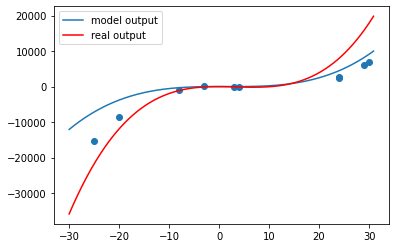

In [210]:
res = np.poly1d([1, -10, -5, 0.6])
domain = np.arange(-30, 31, 0.1)
true_output = np.array([ res(x) for x in domain])
plt.scatter(train_x, train_t)
plt.plot(domain, model(domain), label='model output')
plt.plot(domain, true_output, 'r', label = 'real output')
plt.legend()
print(train_x)
print(model(train_x))
plt.savefig('regulared.png')

In [211]:
print('model output: {}'.format(model(13)))
print('real output: {}'.format(res(13)))

model output: 582.5158601186794
real output: 442.6
